In [1]:
#Exploratory data analysis
import pandas as pd
import numpy as np
from pandas import set_option
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# The variables of interest are the WHO global TB incidence indicators
# Hence,features that are not amongst the WHO global indicators have been dropped

header_names = ['country', 'iso_numeric', 'g_whoregion', 'year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = header_names)

set_option("display.width", 100)

print(tb_data.shape)
print(tb_data.dtypes)
#print("\nTB epidemiology dataset Features: \n", tb_data.columns)
print("\nTB epidemiology dataset Variables of Interest: \n", tb_data.head(n=1))

#checking the total number of TB burden countries
total_country = pd.unique(tb_data.country)
print("\nTotal number of TB burden countries\n", len(total_country))

#checking the total number of year for the data set
total_year= pd.unique(tb_data.year)
print("\nPeriod of the study\n", len(total_year))


(2364, 12)
country                   object
iso_numeric                int64
g_whoregion               object
year                       int64
e_pop_num                  int64
e_inc_100k               float64
e_inc_tbhiv_100k         float64
e_mort_exc_tbhiv_100k    float64
e_mort_tbhiv_100k        float64
e_mort_100k              float64
c_newinc_100k            float64
c_cdr                    float64
dtype: object

TB epidemiology dataset Variables of Interest: 
        country  iso_numeric g_whoregion  year  e_pop_num  e_inc_100k  e_inc_tbhiv_100k  \
0  Afghanistan            4         EMR  2010   29185511       189.0              0.05   

   e_mort_exc_tbhiv_100k  e_mort_tbhiv_100k  e_mort_100k  c_newinc_100k  c_cdr  
0                   43.0               0.43         43.0           96.0   51.0  

Total number of TB burden countries
 215

Period of the study
 11


In [9]:
# Exploratory data analysis - understanding datatypes of features, and checking for missing values
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

header_names = ['country', 'iso_numeric', 'g_whoregion', 'year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = header_names)

set_option("display.width", 100)

#checking for missing data

#checking for missing data

tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
print(len(tb_empty_data))
tb_empty_data.apply(pd.to_numeric, errors ="coerce").info()
print('\nThe total number of missing values in the dataset\n', tb_data.isnull().sum().sum())


290
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 4 to 2360
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                0 non-null      float64
 1   iso_numeric            290 non-null    int64  
 2   g_whoregion            0 non-null      float64
 3   year                   290 non-null    int64  
 4   e_pop_num              290 non-null    int64  
 5   e_inc_100k             290 non-null    float64
 6   e_inc_tbhiv_100k       22 non-null     float64
 7   e_mort_exc_tbhiv_100k  279 non-null    float64
 8   e_mort_tbhiv_100k      279 non-null    float64
 9   e_mort_100k            279 non-null    float64
 10  c_newinc_100k          231 non-null    float64
 11  c_cdr                  168 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 29.5 KB

The total number of missing values in the dataset
 482


In [24]:
# Exploratory data analysis - Dropping categorical variables
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
import datetime as dt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

header_names = ['country', 'iso_numeric', 'g_whoregion', 'year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = header_names)

set_option("display.width", 100)

#checking for missing data

tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print(len(tb_empty_data))
#tb_empty_data.apply(pd.to_numeric, errors ="coerce").info()

# Features such as 'country', 'iso_numeric', 'g_whoregion', are not significant
# for the model and will #be dropped

new_tb_data = tb_data.drop(columns =['country', 'iso_numeric', 'g_whoregion', 'year'], axis=1)
print(new_tb_data.dtypes)


e_pop_num                  int64
e_inc_100k               float64
e_inc_tbhiv_100k         float64
e_mort_exc_tbhiv_100k    float64
e_mort_tbhiv_100k        float64
e_mort_100k              float64
c_newinc_100k            float64
c_cdr                    float64
dtype: object


In [1]:
#checking for missing values after dropping categorical variables and converting all features to float
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

header_names = ['country', 'iso_numeric', 'g_whoregion', 'year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = header_names)

set_option("display.width", 100)

#checking for missing data

tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
print(len(tb_empty_data))

#get the percentage of missing value by variables
ratio_missing = tb_empty_data.isnull().median()*100
print(ratio_missing)

#tb_empty_data.apply(pd.to_numeric, errors ="coerce").info()

# Features such as 'country', 'iso_numeric', 'g_whoregion', are not significant
# for the model and will #be dropped

new_tb_data = tb_data.drop(columns =['country', 'iso_numeric', 'g_whoregion', 'year'], axis=1)

new_tb_data = new_tb_data.astype({'e_pop_num':'float'})
print(new_tb_data.shape)
print(new_tb_data.dtypes)
print(new_tb_data.head(1))

290
country                    0.0
iso_numeric                0.0
g_whoregion                0.0
year                       0.0
e_pop_num                  0.0
e_inc_100k                 0.0
e_inc_tbhiv_100k         100.0
e_mort_exc_tbhiv_100k      0.0
e_mort_tbhiv_100k          0.0
e_mort_100k                0.0
c_newinc_100k              0.0
c_cdr                      0.0
dtype: float64
(2364, 8)
e_pop_num                float64
e_inc_100k               float64
e_inc_tbhiv_100k         float64
e_mort_exc_tbhiv_100k    float64
e_mort_tbhiv_100k        float64
e_mort_100k              float64
c_newinc_100k            float64
c_cdr                    float64
dtype: object
    e_pop_num  e_inc_100k  e_inc_tbhiv_100k  e_mort_exc_tbhiv_100k  e_mort_tbhiv_100k  \
0  29185511.0       189.0              0.05                   43.0               0.43   

   e_mort_100k  c_newinc_100k  c_cdr  
0         43.0           96.0   51.0  


In [6]:
# Data cleaning - replacing all missing values with median and double-checking missing values
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#export data to csv after replacement of the missing data using the median strategy
tb_data.to_csv("tb_median_data.csv", index=False)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
print("\n Missing data after replacement\n", tb_empty_data)
print(tb_data.head(n=1))


 Missing data after replacement
 Empty DataFrame
Columns: [e_pop_num, e_inc_100k, e_inc_tbhiv_100k, e_mort_exc_tbhiv_100k, e_mort_tbhiv_100k, e_mort_100k, c_newinc_100k, c_cdr]
Index: []
    e_pop_num  e_inc_100k  e_inc_tbhiv_100k  e_mort_exc_tbhiv_100k  e_mort_tbhiv_100k  \
0  29185511.0       189.0              0.05                   43.0               0.43   

   e_mort_100k  c_newinc_100k  c_cdr  
0         43.0           96.0   51.0  


In [7]:
#Data understanding and Exploratory Analysis - Statistical Techniques

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

#display basic statistics of the dataset
data_stats = tb_data.describe().T.round(2)
data_var = tb_data.var().T.round(4)
data_corr = tb_data.corr().T.round(4)
data_skew = tb_data.skew().sort_values(ascending=False)
data_kurt = tb_data.kurt().sort_values(ascending=False)
print("\nData basic statistics: \n", data_stats)
print("\nData variance: \n", data_var)
print("\nData correlation: \n", data_corr)
print("\nData skewness: \n", data_skew)
print("\nData Kurtosis: \n", data_kurt)



Data basic statistics: 
                         count         mean           std     min        25%         50%  \
e_pop_num              2364.0  34207359.93  1.353430e+08  1129.0  763301.75  6386483.50   
e_inc_100k             2364.0       112.96  1.658500e+02     0.0      10.00       44.00   
e_inc_tbhiv_100k       2364.0        24.62  8.530000e+01     0.0       0.23        1.95   
e_mort_exc_tbhiv_100k  2364.0        12.93  1.993000e+01     0.0       0.69        3.50   
e_mort_tbhiv_100k      2364.0         8.09  2.768000e+01     0.0       0.02        0.22   
e_mort_100k            2364.0        21.03  4.135000e+01     0.0       0.79        4.20   
c_newinc_100k          2364.0        70.43  9.641000e+01     0.0       9.00       35.00   
c_cdr                  2364.0        76.08  5.055000e+01     0.0      64.00       80.00   

                              75%           max  
e_pop_num              22918278.0  1.439324e+09  
e_inc_100k                  149.0  1.590000e+03  
e_in

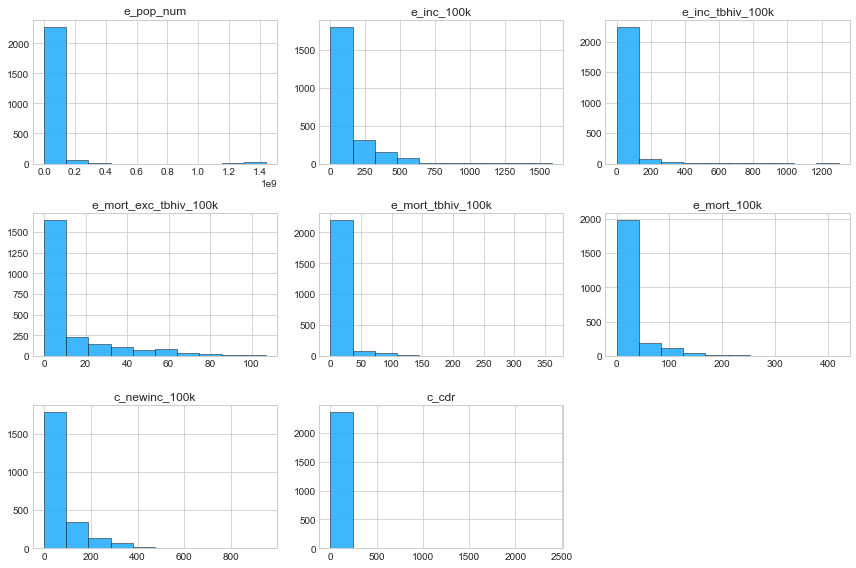

In [25]:
#Data understanding and Exploratory Analysis - Statistical Techniques: Univariate Analysis
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

tb_data.hist(figsize=(12,8), facecolor='#2ab0ff', edgecolor='k', alpha=0.9, linewidth=0.5)
plt.style.use('seaborn-whitegrid')

plt.tight_layout()
plt.show()


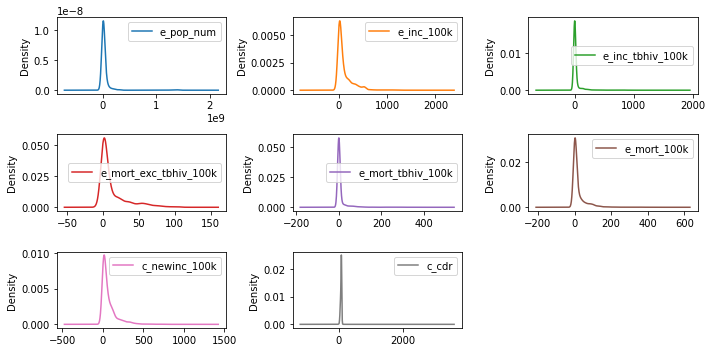

"\n# Plot formatting\nplt.title('Density Plot for TB Epidemic Normalized Features', fontsize =10)\nplt.xlabel('Estimated Inc.TB, TB-HIV, Mort.', fontsize =10)\nplt.ylabel('Density', fontsize =10)\nplt.figure(figsize=(15,15))\n\nplt.show()\n\n"

In [49]:
#Data understanding and Exploratory Analysis - Statistical Techniques: Univariate Analysis
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

tb_data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize =(10, 5))

plt.tight_layout()
plt.show()

"""
# Plot formatting
plt.title('Density Plot for TB Epidemic Normalized Features', fontsize =10)
plt.xlabel('Estimated Inc.TB, TB-HIV, Mort.', fontsize =10)
plt.ylabel('Density', fontsize =10)
plt.figure(figsize=(15,15))

plt.show()

"""


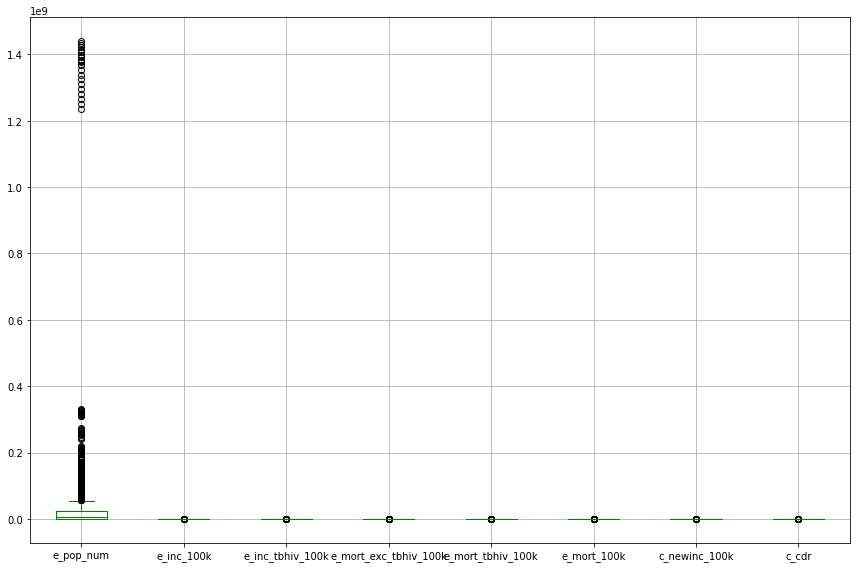

In [43]:
#Data understanding and Exploratory Analysis - Statistical Techniques: Univariate Analysis
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

epidemic_data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

epidemic_data.boxplot(color='g', figsize=(12,8))

plt.tight_layout()
plt.show()

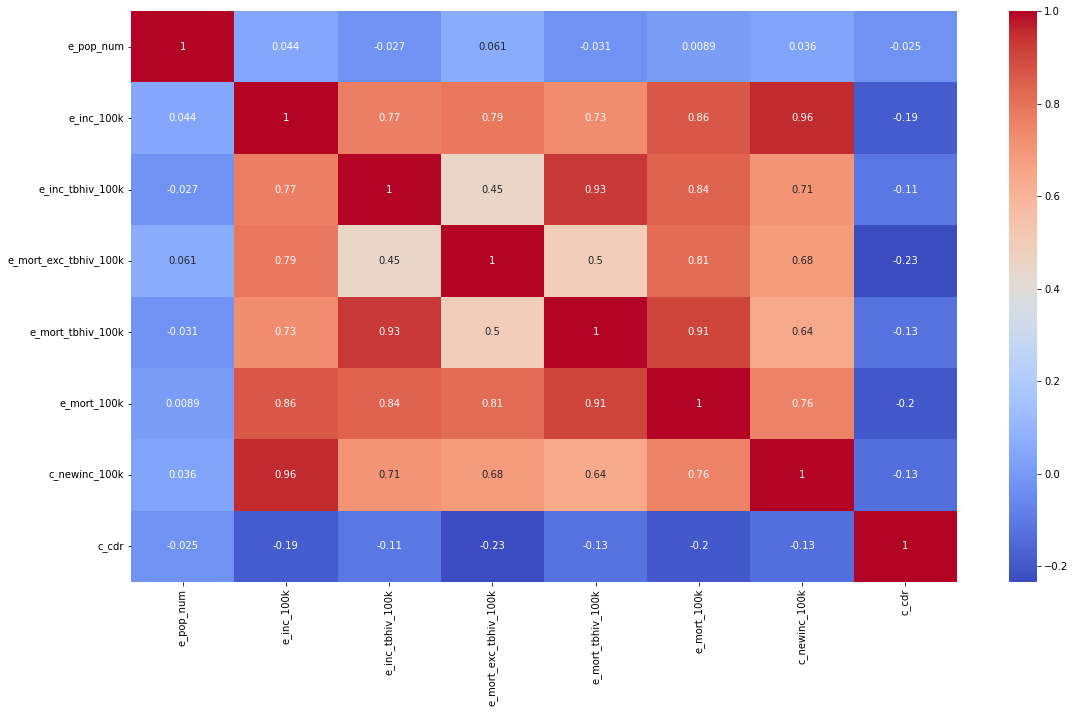

In [2]:
#Data understanding and Exploratory Analysis - Statistical Techniques: Multivariate Analysis
#Pearson correlation heatmap of features
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

epidemic_data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

#Display multivariate analysis using correlation heatmap
#independent variables
X = epidemic_data.iloc[:8]
#dependent variable. i.e crypto price
y = epidemic_data.iloc[:-1]
#get correlation of each variable in the dataset
corrmat = epidemic_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18.5, 10.5))
#plot heatmap
output=sns.heatmap(epidemic_data[top_corr_features].corr(),annot=True,cmap="coolwarm") #cmap="RdYlGn"
plt.show()

In [52]:
#Correlation coefficient
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

epidemic_data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

correlate = epidemic_data.corr()
print("\n High Correlation Filter\n", correlate)


 High Correlation Filter
                        e_pop_num  e_inc_100k  e_inc_tbhiv_100k  e_mort_exc_tbhiv_100k  \
e_pop_num               1.000000    0.044015         -0.027228               0.060717   
e_inc_100k              0.044015    1.000000          0.765957               0.786478   
e_inc_tbhiv_100k       -0.027228    0.765957          1.000000               0.446084   
e_mort_exc_tbhiv_100k   0.060717    0.786478          0.446084               1.000000   
e_mort_tbhiv_100k      -0.030577    0.725618          0.931781               0.496018   
e_mort_100k             0.008928    0.864727          0.838488               0.813730   
c_newinc_100k           0.035628    0.956166          0.708811               0.684836   
c_cdr                  -0.025381   -0.187337         -0.106246              -0.234008   

                       e_mort_tbhiv_100k  e_mort_100k  c_newinc_100k     c_cdr  
e_pop_num                      -0.030577     0.008928       0.035628 -0.025381  
e_inc_100

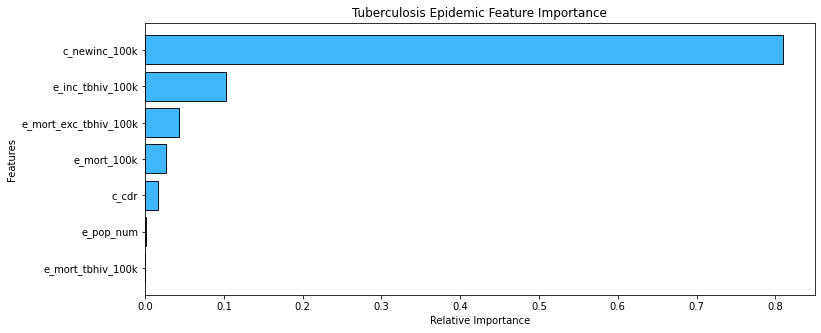

In [4]:
#Instantiating the feature improtance using Random Forest Classifier
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

epidemic_data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

#Establising feature importance using Random Forest Classifier

X_data = epidemic_data.drop(["e_inc_100k"], axis=1)


#declare the RandomForest model
rf_model = RandomForestRegressor(random_state=1, max_depth=4)

#fit the RandomForest model
rf_model.fit(X_data, epidemic_data.e_inc_100k, set_printoptions(precision=2))

train_features = X_data.columns
feat_significance = rf_model.feature_importances_

#declaring the top 10 features
indices = np.argsort(feat_significance)[-8:]

#plot graph of feature importance for better visualization
plt.figure(figsize=(12,5))
plt.title ("Tuberculosis Epidemic Feature Importance")
plt.barh(range(len(indices)), feat_significance[indices], align="center", facecolor='#2ab0ff', edgecolor='k', alpha=0.9)
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

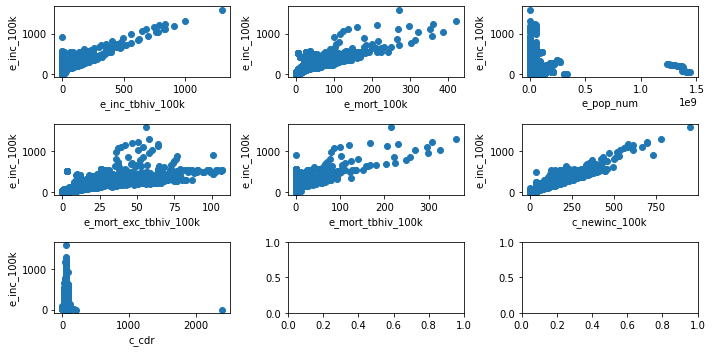

In [72]:
#Data understanding and Exploratory Analysis - Statistical Techniques: Bivariate Analysis
# Scatterplot of features before normalizing the features
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

#define the dimension of the subplots(rows, columns)

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(10, 5, forward=True)

#create scatter plot for the dependent(e_inc_100k) and independent variables(e_inc_tbhiv_100k & e_mort_100k)
axs[0,0].scatter(tb_data["e_inc_tbhiv_100k"], tb_data["e_inc_100k"])
axs[0,0].set_xlabel("e_inc_tbhiv_100k")
axs[0,0].set_ylabel("e_inc_100k")

axs[0,1].scatter(tb_data["e_mort_100k"], tb_data["e_inc_100k"])
axs[0,1].set_xlabel("e_mort_100k")
axs[0,1].set_ylabel("e_inc_100k")

axs[0,2].scatter(tb_data["e_pop_num"], tb_data["e_inc_100k"])
axs[0,2].set_xlabel("e_pop_num")
axs[0,2].set_ylabel("e_inc_100k")

axs[1,0].scatter(tb_data["e_mort_exc_tbhiv_100k"], tb_data["e_inc_100k"])
axs[1,0].set_xlabel("e_mort_exc_tbhiv_100k")
axs[1,0].set_ylabel("e_inc_100k")

axs[1,1].scatter(tb_data["e_mort_tbhiv_100k"], tb_data["e_inc_100k"])
axs[1,1].set_xlabel("e_mort_tbhiv_100k")
axs[1,1].set_ylabel("e_inc_100k")

axs[1,2].scatter(tb_data["c_newinc_100k"], tb_data["e_inc_100k"])
axs[1,2].set_xlabel("c_newinc_100k")
axs[1,2].set_ylabel("e_inc_100k")

axs[2,0].scatter(tb_data["c_cdr"], tb_data["e_inc_100k"])
axs[2,0].set_xlabel("c_cdr")
axs[2,0].set_ylabel("e_inc_100k")

plt.tight_layout()
plt.show()

In [35]:
#Performing Sklearn power transformer of features to remove skewness and outliers
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
transf_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

#display the first 5 and export the transformed data to csv
transf_data.to_csv("transormed_data.csv")
transf_data.head()

#display basic statistics of the transformed dataset
transf_data_stats = transf_data.describe().T.round(4)
transf_data_var = transf_data.var().T.round(4)
transf_data_corr = transf_data.corr().T.round(4)
transf_data_skew = transf_data.skew().sort_values(ascending=False)
transf_data_kurt = transf_data.kurt().sort_values(ascending=False)
print("\nData basic statistics: \n", transf_data_stats)
print("\nData variance: \n", transf_data_var)
print("\nData correlation: \n", transf_data_corr)
print("\nData skewness: \n", transf_data_skew)
print("\nData kurtosis: \n", transf_data_kurt)

[ 0.09699507  0.06238634 -0.42115745 -0.23192252 -0.90777737 -0.24267515
  0.09141757  0.32029891]

Data basic statistics: 
                         count  mean     std     min     25%     50%     75%      max
e_pop_num              2364.0   0.0  1.0002 -2.3957 -0.7188  0.1002  0.6806   3.1410
e_inc_100k             2364.0  -0.0  1.0002 -2.1173 -0.8320  0.0179  0.8058   2.5341
e_inc_tbhiv_100k       2364.0  -0.0  1.0002 -1.3089 -1.0182 -0.0349  0.7861   2.0027
e_mort_exc_tbhiv_100k  2364.0   0.0  1.0002 -1.5544 -0.9697 -0.0518  0.9380   1.8255
e_mort_tbhiv_100k      2364.0  -0.0  1.0002 -0.9344 -0.8840 -0.4664  0.8542   1.8861
e_mort_100k            2364.0   0.0  1.0002 -1.5747 -0.9569 -0.0285  0.8997   2.0324
c_newinc_100k          2364.0   0.0  1.0002 -2.1440 -0.8218  0.0435  0.7616   2.7747
c_cdr                  2364.0  -0.0  1.0002 -7.8803 -0.4568  0.2784  0.5690  21.4630

Data variance: 
 e_pop_num                1.0004
e_inc_100k               1.0004
e_inc_tbhiv_100k         1.0

[ 0.09699507  0.06238634 -0.42115745 -0.23192252 -0.90777737 -0.24267515
  0.09141757  0.32029891]


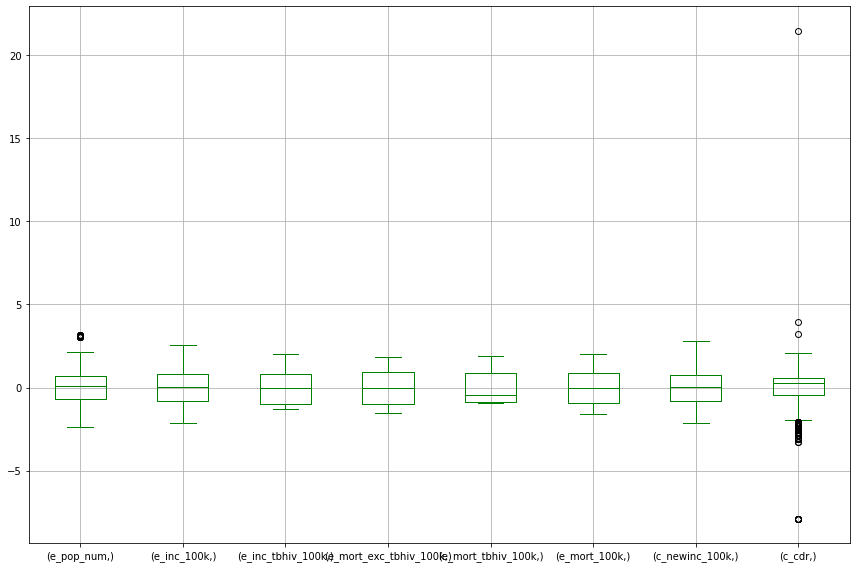

In [33]:
#Display the boxplot of features after features normalization
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
transf_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

transf_data.boxplot(color='g', figsize=(12,8))

plt.tight_layout()
plt.show()

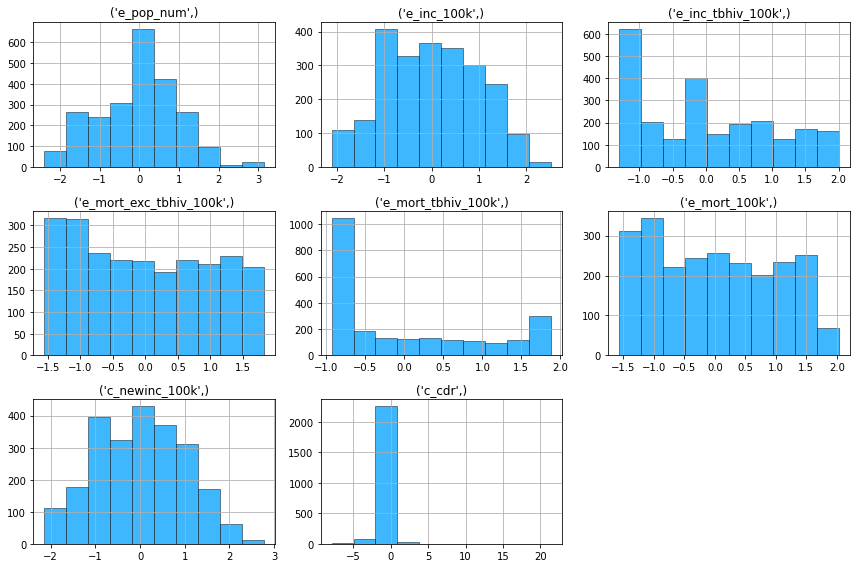

In [3]:
#Histogram after normalization of the features
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
#print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
transf_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

transf_data.hist(figsize=(12,8), facecolor='#2ab0ff', edgecolor='k', alpha=0.9, linewidth=0.5)

plt.tight_layout()
plt.show()

[ 0.09699507  0.06238634 -0.42115745 -0.23192252 -0.90777737 -0.24267515
  0.09141757  0.32029891]
0


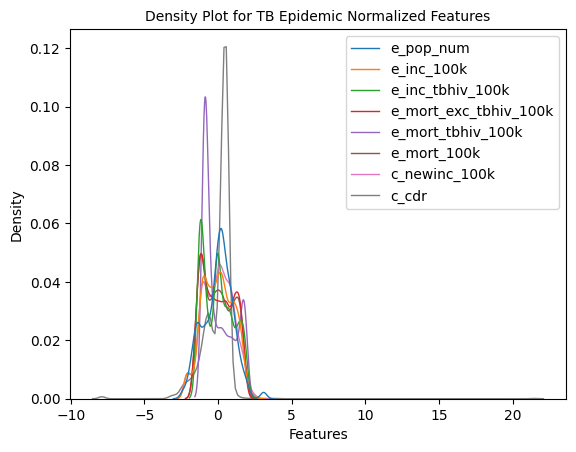

<Figure size 1500x1000 with 0 Axes>

In [4]:
#Density plot of normalized data
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
transf_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

empty_data = transf_data[transf_data.isna().any(axis=1)]
print(len(empty_data))

sns.kdeplot(data=transf_data, linewidth = 1) #palette = 'Dark2', alpha = 0.1, levels =10, multiple ='stack'

# Plot formatting
plt.title('Density Plot for TB Epidemic Normalized Features', fontsize =10)
plt.xlabel('Features', fontsize =10)
plt.ylabel('Density', fontsize =10)
plt.figure(figsize=(15,10))

plt.show()


[ 0.09699507  0.06238634 -0.42115745 -0.23192252 -0.90777737 -0.24267515
  0.09141757  0.32029891]


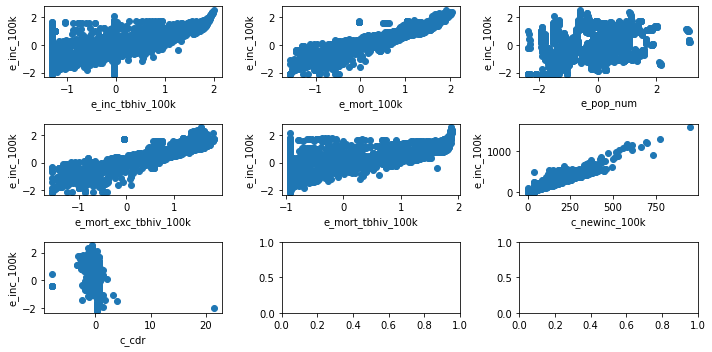

In [34]:
#Scatter plot after normalization of the features
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
transf_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

#define the dimension of the subplots(rows, columns)

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(10, 5, forward=True)

#create scatter plot for the dependent(e_inc_100k) and independent variables(e_inc_tbhiv_100k & e_mort_100k)

axs[0,0].scatter(transf_data["e_inc_tbhiv_100k"], transf_data["e_inc_100k"])
axs[0,0].set_xlabel("e_inc_tbhiv_100k")
axs[0,0].set_ylabel("e_inc_100k")

axs[0,1].scatter(transf_data["e_mort_100k"], transf_data["e_inc_100k"])
axs[0,1].set_xlabel("e_mort_100k")
axs[0,1].set_ylabel("e_inc_100k")

axs[0,2].scatter(transf_data["e_pop_num"], transf_data["e_inc_100k"])
axs[0,2].set_xlabel("e_pop_num")
axs[0,2].set_ylabel("e_inc_100k")

axs[1,0].scatter(transf_data["e_mort_exc_tbhiv_100k"], transf_data["e_inc_100k"])
axs[1,0].set_xlabel("e_mort_exc_tbhiv_100k")
axs[1,0].set_ylabel("e_inc_100k")

axs[1,1].scatter(transf_data["e_mort_tbhiv_100k"], transf_data["e_inc_100k"])
axs[1,1].set_xlabel("e_mort_tbhiv_100k")
axs[1,1].set_ylabel("e_inc_100k")

axs[1,2].scatter(tb_data["c_newinc_100k"], tb_data["e_inc_100k"])
axs[1,2].set_xlabel("c_newinc_100k")
axs[1,2].set_ylabel("e_inc_100k")

axs[2,0].scatter(transf_data["c_cdr"], transf_data["e_inc_100k"])
axs[2,0].set_xlabel("c_cdr")
axs[2,0].set_ylabel("e_inc_100k")

plt.tight_layout()
plt.show()

In [3]:
#fitting the model using the original 7 predictors WITHOUT any dimensionality reduced datasets

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
#print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
normalized_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

#fitting the model using the original features without dimensionality reduction
#separate the data into X(train) and (ytest) groups - training and target sets

train_headers = ['e_pop_num', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

target_header = ['e_inc_100k']

A= normalized_data[train_headers]
B = normalized_data[target_header]

# get the variables which allows us to carryout mutliple linear regression

X = A.iloc[:,0:7].values
y = B.iloc[:,0:1].values

#split data into 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

#display the first 8 X_test and y_test data after the train_test split
print("\nFirst 3 X_test data after train_test split: \n", X_test[:3])
print("\nFirst 3 y_test: \n", y_test[0:3])

#check the dimension of the train and test split
print('\nThe total of training dataset: \n', X_train.shape)
print('\nThe total of testing dataset: \n', X_test.shape)

#initialise the linear regression model
lr_regression = LinearRegression()

#fit and train the regression model
lr_regression.fit(X_train, y_train)

#predict model on test data
y_pred_test = lr_regression.predict(X_test)
#print(y_pred_test)

#predict model on test data
y_pred_train = lr_regression.predict(X_train)
#print(y_pred_train)

#evaluation of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2 = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

#display the model evaluation parameters values
print("\nRegression coef/slope/gradient: ", lr_regression.coef_)
print("Intercept/constant: ", lr_regression.intercept_)
print("Mean absolute error: {:.2}".format(mae_tb))
print("Mean square error: {:.2}".format(mse_tb))
print("Root mean squared error: {:.2}".format(rmse_tb))
print("R2 score_test: {:.2} ".format(r2))
print("R2 score_train: {:.2} ".format(r2_train ))



First 3 X_test data after train_test split: 
 [[-0.1886526   1.20677292  1.12944703  1.52523655  1.1072115   0.7447803
  -0.6080534 ]
 [-0.52264214  0.35831038 -0.21896545  0.12036196 -0.15857847 -0.33301474
   0.5690128 ]
 [ 1.267744   -1.17192737 -0.70166888 -0.8839514  -0.75813625 -0.27076523
   0.5690128 ]]

First 3 y_test: 
 [[ 0.8057723 ]
 [-0.37057767]
 [-0.32195741]]

The total of training dataset: 
 (1891, 7)

The total of testing dataset: 
 (473, 7)

Regression coef/slope/gradient:  [[ 0.03829137 -0.10030429 -0.12705685  0.04238941  0.41326235  0.70703812
  -0.09867941]]
Intercept/constant:  [0.00096059]
Mean absolute error: 0.093
Mean square error: 0.034
Root mean squared error: 0.18
R2 score_test: 0.96 
R2 score_train: 0.97 


"\ne_inc_100k(y) = 1.79233881 + 0.03829137['e_pop_num'] -0.10030429['e_inc_tbhiv_100k'] -0.12705685['e_mort_exc_tbhiv_100k'] +  0.04238941['e_mort_tbhiv_100k'] + 0.41326235['e_mort_100k'] + 0.70703812['c_newinc_100k']  -0.09867941['c_cdr']\n"

In [4]:
#fitting the model using Multiple Linear Regression with 5 features from dimensionality reduction techniques

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
#print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
normalized_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train) and (ytest) groups - training and target sets

train_headers = ['e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

target_header = ['e_inc_100k']

A= normalized_data[train_headers]
B = normalized_data[target_header]

# get the variables which allows us to carryout mutliple linear regression

X = A.iloc[:,0:5].values
y = B.iloc[:,0:1].values

#split data into 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

#display the first 8 X_test and y_test data after the train_test split
print("\nFirst 8 X_test data after train_test split: \n", X_test[:8])
print("\nFirst 8 y_test\n", y_test[0:8])

#check the dimension of the train and test split
print('\nThe total of train dataset: \n', X_train.shape, y_train.shape)
print('\nThe total of test dataset: \n', X_test.shape, y_test.shape)

#initialise the linear regression model
lr_regression = LinearRegression()

#fit and train the regression model
lr_regression.fit(X_train, y_train)

#predict model on test data
y_pred_test = lr_regression.predict(X_test)
#print(y_pred_test)

#predict model on test data
y_pred_train = lr_regression.predict(X_train)
#print(y_pred_train)

#evaluation of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2 = r2_score(y_test, y_pred_test)

#display r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#display the model evaluation parameters values
print("\nRegression coef/slope/gradient: ", lr_regression.coef_)
print("Intercept/constant: ", lr_regression.intercept_)
print("Mean absolute error: {:.2}".format(mae_tb))
print("Mean square error: {:.2}".format(mse_tb))
print("Root mean squared error: {:.2}".format(rmse_tb))
print("R2 score_test: {:.2} ".format(r2))
print("R2 score_train: {:.2} ".format(r2_train))

#checking prediction for specific instance or country. For instance, predicting the 2020 TB incidence for
#Eswatini and South Africa: both countries are in Africa

instance_a = lr_regression.predict([[1.71570079, 2.26796169, 2.35685483, 5.59964264, 8.58761291]])
print("/nPredicted TB incidence: ", instance_a)




First 8 X_test data after train_test split: 
 [[ 1.20677292  1.12944703  1.1072115   0.7447803  -0.6080534 ]
 [ 0.35831038 -0.21896545 -0.15857847 -0.33301474  0.5690128 ]
 [-1.17192737 -0.70166888 -0.75813625 -0.27076523  0.5690128 ]
 [-0.03488294 -1.22780759 -1.26119536 -1.31216122  0.5690128 ]
 [-0.19425272  0.52099015  0.41275452  0.35281463  0.5690128 ]
 [ 0.82367258  1.1921873   1.07652608  0.77803979 -0.6080534 ]
 [-0.55183297 -0.5401695  -0.53800456 -0.81549086  0.27837708]
 [ 1.79146803  1.72707222  1.79852988  1.5048714  -1.63959506]]

First 8 y_test
 [[ 0.8057723 ]
 [-0.37057767]
 [-0.32195741]
 [-1.27599866]
 [ 0.23214013]
 [ 0.83244763]
 [-0.78161376]
 [ 1.71298704]]

The total of train dataset: 
 (1891, 5) (1891, 1)

The total of test dataset: 
 (473, 5) (473, 1)

Regression coef/slope/gradient:  [[-0.07726003 -0.17806503  0.47865536  0.71526628 -0.10590926]]
Intercept/constant:  [0.00021591]
Mean absolute error: 0.094
Mean square error: 0.035
Root mean squared error: 0.

C:\Users\hp\AppData\Local\Temp\ipykernel_10128\1109823377.py:63: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)



First 8 X_test data after train_test split: 
 [[ 1.20677292  1.12944703  1.1072115   0.7447803  -0.6080534 ]
 [ 0.35831038 -0.21896545 -0.15857847 -0.33301474  0.5690128 ]
 [-1.17192737 -0.70166888 -0.75813625 -0.27076523  0.5690128 ]
 [-0.03488294 -1.22780759 -1.26119536 -1.31216122  0.5690128 ]
 [-0.19425272  0.52099015  0.41275452  0.35281463  0.5690128 ]
 [ 0.82367258  1.1921873   1.07652608  0.77803979 -0.6080534 ]
 [-0.55183297 -0.5401695  -0.53800456 -0.81549086  0.27837708]
 [ 1.79146803  1.72707222  1.79852988  1.5048714  -1.63959506]]

First 8 y_test
 [[ 0.8057723 ]
 [-0.37057767]
 [-0.32195741]
 [-1.27599866]
 [ 0.23214013]
 [ 0.83244763]
 [-0.78161376]
 [ 1.71298704]]

The total of train dataset: 
 (1891, 5) (1891, 1)

The total of test dataset: 
 (473, 5) (473, 1)

Regression coef/slope/gradient:  [[-0.07726003 -0.17806503  0.47865536  0.71526628 -0.10590926]]
Intercept/constant:  [0.00021591]
Mean absolute error: 0.094
Mean square error: 0.035
Root mean squared error: 0.

C:\Users\hp\AppData\Local\Temp\ipykernel_10128\1109823377.py:63: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_10128\1109823377.py:63: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)



First 8 X_test data after train_test split: 
 [[ 1.20677292  1.12944703  1.1072115   0.7447803  -0.6080534 ]
 [ 0.35831038 -0.21896545 -0.15857847 -0.33301474  0.5690128 ]
 [-1.17192737 -0.70166888 -0.75813625 -0.27076523  0.5690128 ]
 [-0.03488294 -1.22780759 -1.26119536 -1.31216122  0.5690128 ]
 [-0.19425272  0.52099015  0.41275452  0.35281463  0.5690128 ]
 [ 0.82367258  1.1921873   1.07652608  0.77803979 -0.6080534 ]
 [-0.55183297 -0.5401695  -0.53800456 -0.81549086  0.27837708]
 [ 1.79146803  1.72707222  1.79852988  1.5048714  -1.63959506]]

First 8 y_test
 [[ 0.8057723 ]
 [-0.37057767]
 [-0.32195741]
 [-1.27599866]
 [ 0.23214013]
 [ 0.83244763]
 [-0.78161376]
 [ 1.71298704]]

The total of train dataset: 
 (1891, 5) (1891, 1)

The total of test dataset: 
 (473, 5) (473, 1)

Regression coef/slope/gradient:  [[-0.07726003 -0.17806503  0.47865536  0.71526628 -0.10590926]]
Intercept/constant:  [0.00021591]
Mean absolute error: 0.094
Mean square error: 0.035
Root mean squared error: 0.

C:\Users\hp\AppData\Local\Temp\ipykernel_10128\1109823377.py:63: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)


In [31]:
#fitting the model with Multiple Linear regression and the two strong importance features to further
# reduce multicollinearity

import pandas as pd
import numpy as np
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
#print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
normalized_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train) and (ytest) groups - training and target sets

train_headers = ['e_inc_tbhiv_100k', 'c_newinc_100k']

target_header = ['e_inc_100k']

A= normalized_data[train_headers]
B = normalized_data[target_header]

# get the variables which allows us to carryout mutliple linear regression

X = A.iloc[:,0:2].values
y = B.iloc[:,0:1].values


#split data into 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

#display the first 5 X_test and y_test data after the train_test split
print("\nFirst 5 X_test data after train_test split: \n", X_test[:5])
print("\nFirst 5 y_test\n", y_test[0:5])

#check the dimension of the train and test split
print('\nThe total of train dataset: \n', X_train.shape, y_train.shape)
print('\nThe total of test dataset: \n', X_test.shape, y_test.shape)


#initialise the linear regression model
lr_regression = LinearRegression()

#fit and train the regression model
lr_regression.fit(X_train, y_train)

#predict model on test data
y_pred_test = lr_regression.predict(X_test)

#predict model on test data
y_pred_train = lr_regression.predict(X_train)

#evaluation of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2 = r2_score(y_test, y_pred_test)

#display r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#display the model evaluation parameters values
print("\nRegression coef/slope/gradient: ", lr_regression.coef_)
print("Intercept/constant: ", lr_regression.intercept_)
print("Mean absolute error: {:.4}".format(mae_tb))
print("Mean square error: {:.4}".format(mse_tb))
print("Root mean squared error: {:.4}".format(rmse_tb))
print("R2 score for test dataset: {:.4} ".format(r2))
print("R2 score for train dataset: {:.4} ".format(r2_train))

#checking prediction for specific instance or country. For instance, predicting the 2020 TB incidence for
#Eswatini and South Africa: both countries are in Africa

Instance_1 = lr_regression.predict([[1.20677292, 0.7447803]])
print("/nPrediction of TB incidence for instance 1 : ", Instance_1)
Instance_2 = lr_regression.predict([[0.35831038, -0.33301474]])
print("/nPrediction of TB incidence for instance 2: ", Instance_2)


#The mutliple regression model
#y[['e_inc_100k'] = 0.0000617+ 0.0779189['e_inc_tbhiv_100k'] +  0.91473993['c_newinc_100k']


First 5 X_test data after train_test split: 
 [[ 1.20677292  0.7447803 ]
 [ 0.35831038 -0.33301474]
 [-1.17192737 -0.27076523]
 [-0.03488294 -1.31216122]
 [-0.19425272  0.35281463]]

First 5 y_test
 [[ 0.8057723 ]
 [-0.37057767]
 [-0.32195741]
 [-1.27599866]
 [ 0.23214013]]

The total of train dataset: 
 (1891, 2) (1891, 1)

The total of test dataset: 
 (473, 2) (473, 1)

Regression coef/slope/gradient:  [[0.0779189  0.91473993]]
Intercept/constant:  [6.17162435e-05]
Mean absolute error: 0.1274
Mean square error: 0.07319
Root mean squared error: 0.2705
R2 score for test dataset: 0.9208 
R2 score for train dataset: 0.9373 
/nPrediction of TB incidence for instance 1 :  [[0.77537242]]
/nPrediction of TB incidence for instance 2:  [[-0.27664101]]


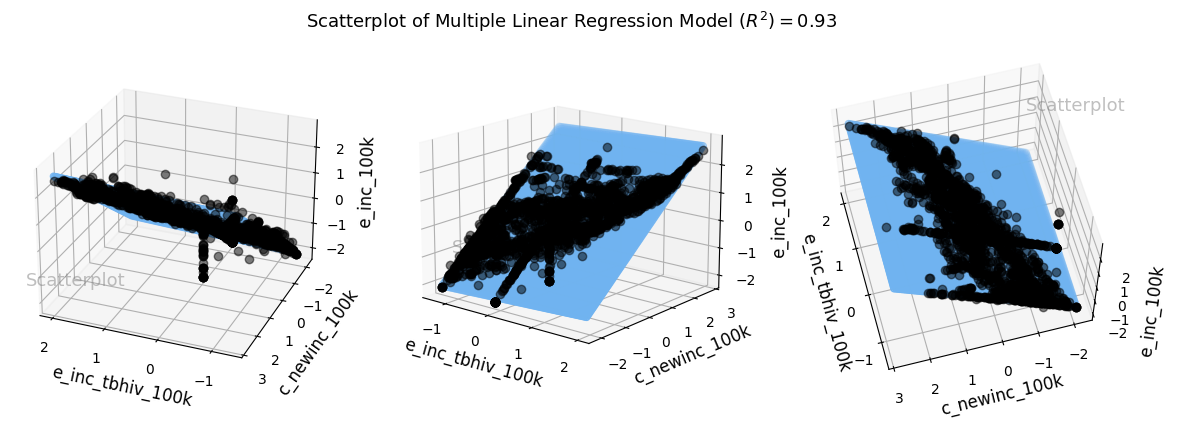

In [80]:
#scatter plot with line of best fit for multiple linear regression based on the coeeficients
# Scaled Features with power transformer

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
#print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
normalized_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train) and (ytest) groups - training and target sets

train_headers = ['e_inc_tbhiv_100k', 'c_newinc_100k']

target_header = ['e_inc_100k']

A= normalized_tb_data[train_headers]
B = normalized_tb_data[target_header]

# get the variables which allows us to carryout multiple linear regression

X = A.iloc[:,0:2].values.reshape(-1,2)
Y = B.iloc[:,0:1].values

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train) and (ytest) groups - training and target sets


# prepare model data point for visualization

x = X[:, 0]
y = X[:, 1]
z = Y[:, 0]

x_pred = np.linspace(A.e_inc_tbhiv_100k.min(), A.e_inc_tbhiv_100k.max(), 100)
y_pred = np.linspace(A.c_newinc_100k.min(), A.c_newinc_100k.max(), 100)

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# training of the model

ols = linear_model.LinearRegression()
model = ols.fit(A, B)
predicted = model.predict(model_viz)

# model evaluation
r2 = model.score(A, B)

#multiple regression model visualization

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5, label='Regression model')
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0', label='Sample data')
    ax.set_xlabel('e_inc_tbhiv_100k', fontsize=12)
    ax.set_ylabel('c_newinc_100k', fontsize=12)
    ax.set_zlabel('e_inc_100k', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'Scatterplot', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'Scatterplot', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'Scatterplot', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

"""
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)
"""


fig.suptitle('Scatterplot of Multiple Linear Regression Model ($R^2) = %.2f$' % r2, fontsize=13)

fig.tight_layout()


C:\Users\hp\AppData\Local\Temp\ipykernel_10128\1799982813.py:66: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)


(1891, 2) (1891, 1)
(473, 2) (473, 1)
Score:  0.9488406919289777

Coefficients of the model %.2f [[0.07156967 0.92010483]]

intercept of the model %.2f [-0.00248842]


<function matplotlib.pyplot.show(close=None, block=None)>

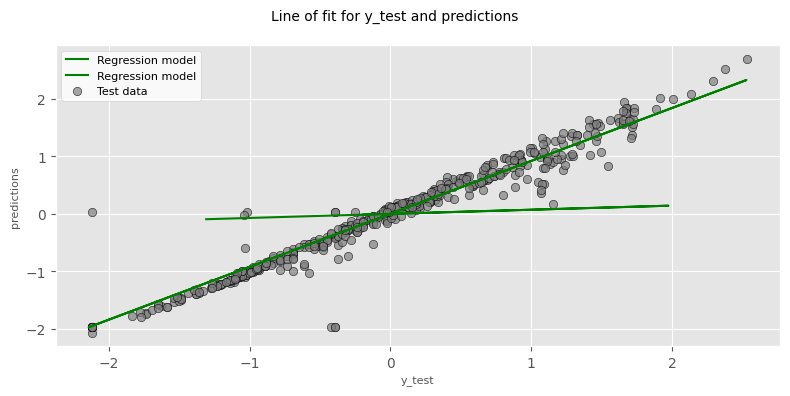

In [5]:
#Scatter plot for y_test and y_predictions

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

new_header_names = ['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])


features = data[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']]

#considering the features are positively skewed and does not follow a linear (Gaussian distribution)
#to improve the performance of the predictive model, the PowerTransformer in Sklearn will
#be used to log-transformed the features

#instantiate the power transformer model
pt = PowerTransformer(method='yeo-johnson', standardize=True)

#fit the data to the powertransformer
skl_yeojohnson = pt.fit(features)

#display the Lambdas
#print(skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(features)

#Pass the transformed data into a new dataframe
normalized_data = pd.DataFrame(data=skl_yeojohnson, columns=[['e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']])

normalized_tb_data= normalized_data.drop(columns=['e_pop_num', 'e_mort_tbhiv_100k'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train) and (ytest) groups - training and target sets

train_headers = ['e_inc_tbhiv_100k', 'c_newinc_100k']

target_header = ['e_inc_100k']

A= normalized_tb_data[train_headers]
B = normalized_tb_data[target_header]

# get the variables which allows us to carryout multiple linear regression

X = A.iloc[:,0:2].values.reshape(-1,2)
y = B.iloc[:,0:1].values

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#display the accuracy score
r2 = model.score(X_test, y_test)
print("Score: ", r2)

#display the parameters of the multiple linear regression model
print("\nCoefficients of the model %.2f", lm.coef_)
print("\nintercept of the model %.2f", lm.intercept_)

# display the line of best fit to the model
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train, lm.coef_*X_train+lm.intercept_, "-g", label='Regression model')
ax.scatter(y_test, predictions, edgecolor='k', facecolor='grey', alpha=0.7, label='Test data')
ax.set_xlabel("y_test", fontsize = 8)
ax.set_ylabel("predictions", fontsize =8)
ax.legend(facecolor='white', fontsize=8)

fig.suptitle('Line of fit for y_test and predictions', fontsize=10)

fig.tight_layout()

plt.show

#The mutliple regression model
#y[['e_inc_100k'] = 0.0000617+ 0.0779189['e_inc_tbhiv_100k'] +  0.91473993['c_newinc_100k']

In [8]:
#fitting the model with Multiple Linear regression and the two strong importance features
#WITHOUT any feature scaling (Power transformation) so the original data is not lost

import pandas as pd
import numpy as np
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

#feature scalling is not required so the original data is not lost and optimize the linear regression normal equation
#feature scaling.

#Dataframe of the variables without power transformation

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

train_headers = ['e_inc_tbhiv_100k', 'c_newinc_100k']
target_header = ['e_inc_100k']

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%. This is to train the model
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
#This is to select the best model parameters or features
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%. To rebuild the model
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%. To test the model
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])

#initialise the linear regression model
lr_regression = LinearRegression()
#fit and train the regression model
lr_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X2 = sm.add_constant(X_train)

#refit the model with stats model to produce the coefficients and intercept
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

#use the trained model to predict the y_values for the records in the validation dataset
y_pred_valid = lr_regression.predict(X_valid)
y_pred_train = lr_regression.predict(X_train)
#print("\nPredicted y_values for the validation dataset\n", y_pred_valid)

# create a Dataframe to see the predicted and the actual y_values side-by-side
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_valid})
print("\nActual vs Predictions of TB incidence (Train/Validation Split)\n", df.sort_index())

#evaluation/checking the quality of the regression model of the model based on the success metrics
mae_tb = mean_absolute_error(y_valid, y_pred_valid)
mse_tb = mean_squared_error(y_valid, y_pred_valid)
rmse_tb = np.sqrt(mse_tb)
r2_valid = r2_score(y_valid, y_pred_valid)

#display r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#display the model evaluation parameters values
print("Mean absolute error: {:.4}".format(mae_tb))
print("Mean square error: {:.4}".format(mse_tb))
print("Root mean squared error: {:.4}".format(rmse_tb))
print("R2 score for validation dataset: {:.4} ".format(r2_valid))
print("R2 score for trainplus dataset: {:.4} ".format(r2_train))


                            OLS Regression Results                            
Dep. Variable:             e_inc_100k   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:02:08   Log-Likelihood:                -8694.2
No. Observations:                1655   AIC:                         1.739e+04
Df Residuals:                    1652   BIC:                         1.741e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9892      1.469  

                            OLS Regression Results                            
Dep. Variable:             e_inc_100k   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.457e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:54:42   Log-Likelihood:                -11076.
No. Observations:                2128   AIC:                         2.216e+04
Df Residuals:                    2125   BIC:                         2.217e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0668      1.224  

Text(0, 0.5, 'Incidence of TB per 100k Population')

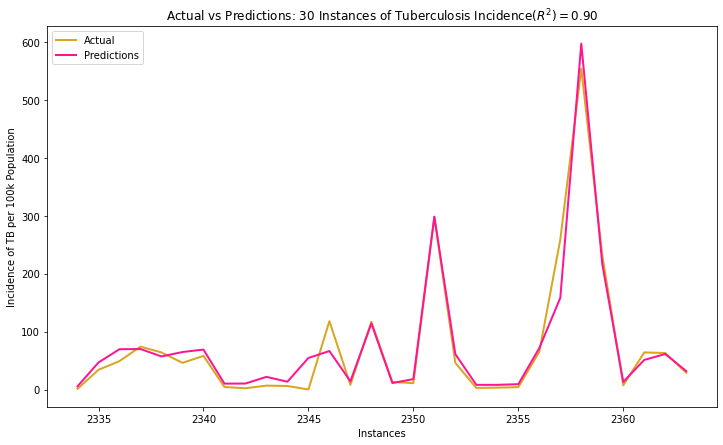

In [10]:
#Testing of the multiple regression model and making future predictions
#by shifting the original data by 30 days to predict the next 30 incidence of TB

import pandas as pd
import numpy as np
import datetime as datetime
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

#Dataframe of the variables without power transformation

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)
#exporting file to csv
#df.to_csv('TB_weka.csv', index=False)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

train_headers = ['e_inc_tbhiv_100k', 'c_newinc_100k']
target_header = ['e_inc_100k']

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])

#Predicting specific instance using the test set and the trainplus-validation dataset
#initialise the linear regression model
lr_regression = LinearRegression()
#fit and train the regression model
lr_regression.fit(X_train_valid, y_train_valid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X2 = sm.add_constant(X_train_valid)

#refit the model with stats model to produce the coefficients and intercept
est = sm.OLS(y_train_valid, X2)
est2 = est.fit()
print(est2.summary())

#use the trainedplusvalid model to predict the y_values for the records in the test dataset
y_pred_test = lr_regression.predict(X_test)
yp_train_valid = lr_regression.predict(X_train_valid)
#print("\nPredicted y_values for the validation dataset\n", y_train_valid)

# create a Dataframe to see the predicted and the actual y_values side-by-side
check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
print("\nActual vs Predictions of TB incidence (TrainplusValidation/Test Split)\n", check.sort_index())

#evaluation/checking the quality of the regression model of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2_test = r2_score(y_test, y_pred_test)

#display r2 for the train dataset
r2_train_valid = r2_score(y_train_valid, yp_train_valid)

#display the model evaluation parameters values
print("Mean absolute error: {:.4}".format(mae_tb))
print("Mean square error: {:.4}".format(mse_tb))
print("Root mean squared error: {:.4}".format(rmse_tb))
print("R2 score for test dataset: {:.4} ".format(r2_test))
print("R2 score for train dataset: {:.4} ".format(r2_train_valid))


future_set = df.shift(periods=30).tail(30)
print("\n Future set of TB incidence\n", future_set)

required_features = ['e_inc_tbhiv_100k',  'c_newinc_100k']
target = future_set['e_inc_100k']

#use the re-trained model to predict the next 30 incidence of TB as the basis for model testing
future_forecast = lr_regression.predict(future_set[required_features])
print(future_forecast)

# create a Dataframe to see the predicted and the actual y_values side-by-side
verify = pd.DataFrame({'Actual': target, 'Forecast': future_forecast})
print("\nActual vs Predictions of TB incidence of TB\n", verify.sort_index())

#Visualization of  previous incidence of TB (in yellow) and next 30 predictions (in pink color)
plt.figure(figsize = (12, 7))
plt.plot(future_set.index, target, color='goldenrod', lw=2, label="Actual")
plt.plot(future_set.index, future_forecast, color='deeppink', lw=2, label="Predictions")
plt.title('Actual vs Predictions: 30 Instances of Tuberculosis Incidence($R^2) = %.2f$' % r2_test, size=12)
plt.xlabel("Instances", size=10)
plt.legend(loc=2) #upper left

plt.ylabel("Incidence of TB per 100k Population", size=10)

#The multiple Linear Regression Model
#y['e_inc_100k'] =  4.0668 + 0.3447['e_inc_tbhiv_100k'] +  1.4205['c_newinc_100k']

(1915, 2) (1915,)
(213, 2) (213,)
Score:  0.9272500507444059

Coefficients of the model %.2f [0.34505928 1.41529015]

intercept of the model %.2f 4.417823497225299


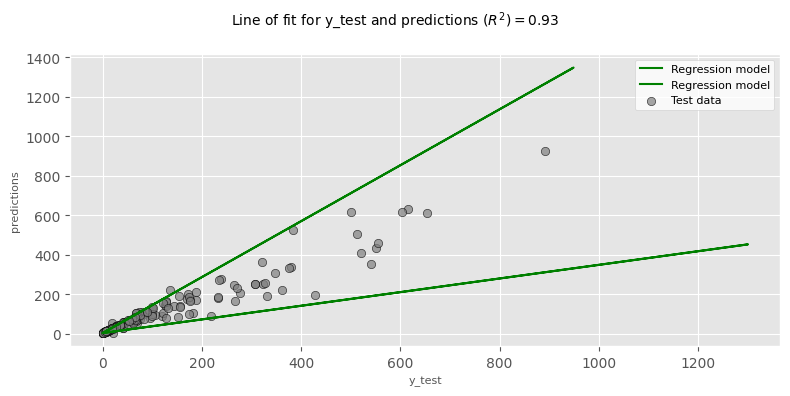

In [172]:
#Multiple Linear Regression Model - Line of Best Fit
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D


new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

#Dataframe of the variables without power transformation

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

train_headers = ['e_inc_tbhiv_100k', 'c_newinc_100k']
target_header = ['e_inc_100k']

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k'].values
X_train_valid = train_valid.drop(columns =['e_inc_100k']).values

y_test = testing['e_inc_100k'].values
X_test = testing.drop(columns =['e_inc_100k']).values

#Splitting the dataset into trainplusvalidation and test split using the sklearn train/test split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_train_valid, y_train_valid, test_size=0.10)
print(X_train_valid.shape, y_train_valid.shape)
print (X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train_valid, y_train_valid)
predictions = lm.predict(X_test)

#display the accuracy score
r2 = model.score(X_test, y_test)
print("Score: ", r2)

#display the parameters of the multiple linear regression model
print("\nCoefficients of the model %.2f", lm.coef_)
print("\nintercept of the model %.2f", lm.intercept_)

# display the line of best fit to the model
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_valid, lm.intercept_ + lm.coef_*X_train_valid, "-g", label='Regression model')
ax.scatter(y_test, predictions, edgecolor='k', facecolor='grey', alpha=0.7, label='Test data')
ax.set_xlabel("y_test", fontsize = 8)
ax.set_ylabel("predictions", fontsize =8)
ax.legend(facecolor='white', fontsize=8)

fig.suptitle('Line of fit for y_test and predictions ($R^2) = %.2f$' % r2, fontsize=10)

fig.tight_layout()

plt.show()


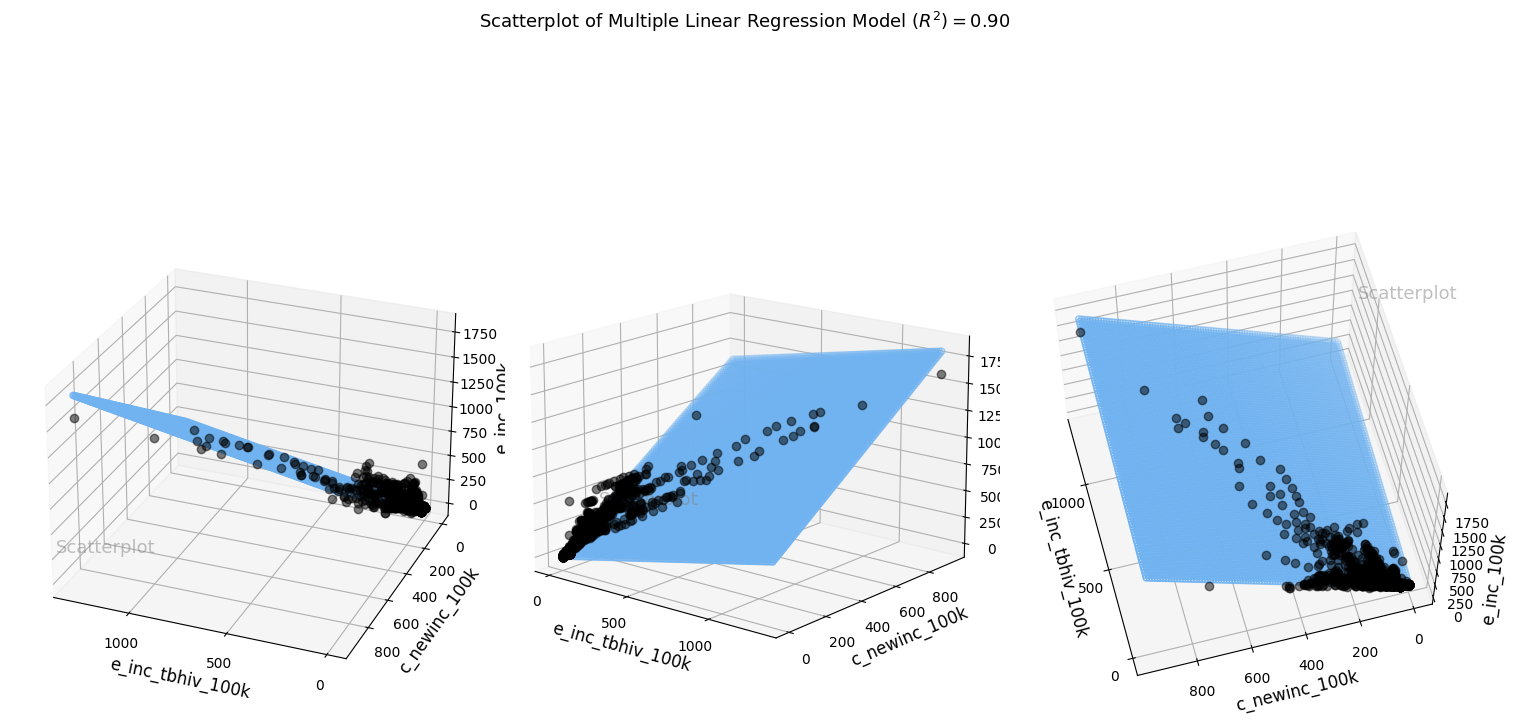

In [79]:
#scatter plot with line of best fit for multiple linear regression based on the coeficients
#unscaled features
import pandas as pd
import numpy as np
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

#Dataframe of the variables without power transformation

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

train_headers = ['e_inc_tbhiv_100k', 'c_newinc_100k']
target_header = ['e_inc_100k']

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])

#Predicting specific instance using the test set and the trainplus-validation dataset
#initialise the linear regression model
lr_regression = LinearRegression()
#fit and train the regression model
lr_regression.fit(X_train_valid, y_train_valid)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
X2 = sm.add_constant(X_train_valid)

#refit the model with stats model to produce the coefficients and intercept
est = sm.OLS(y_train_valid, X2)
est2 = est.fit()
#print(est2.summary())

#use the trainedplusvalid model to predict the y_values for the records in the test dataset
y_pred_test = lr_regression.predict(X_test)
yp_train_valid = lr_regression.predict(X_train_valid)
#print("\nPredicted y_values for the validation dataset\n", y_pred_valid)

# create a Dataframe to see the predicted and the actual y_values side-by-side
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
#print(df.sort_index())

#evaluation/checking the quality of the regression model of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2_valid = r2_score(y_test, y_pred_test)

#display r2 for the train dataset
r2_train_valid = r2_score(y_train_valid, yp_train_valid)

#display the model evaluation parameters values
#print("Mean absolute error: {:.4}".format(mae_tb))
#print("Mean square error: {:.4}".format(mse_tb))
#print("Root mean squared error: {:.4}".format(rmse_tb))
#print("R2 score for test dataset: {:.4} ".format(r2_valid))
#print("R2 score for train dataset: {:.4} ".format(r2_train))

#separate the data into X(train) and (ytest) groups - training and target sets

A= X_train_valid
B = y_train_valid

# get the variables which allows us to carryout multiple linear regression

X = A.iloc[:,0:2].values.reshape(-1,2)
Y = y_train_valid.values

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train) and (ytest) groups - training and target sets

# prepare model data point for visualization

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(A.e_inc_tbhiv_100k.min(), A.e_inc_tbhiv_100k.max(), 100)
y_pred = np.linspace(A.c_newinc_100k.min(), A.c_newinc_100k.max(), 100)

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# training of the model

ols = linear_model.LinearRegression()
model = ols.fit(A, B)
predicted = model.predict(model_viz)

# model evaluation
r2 = model.score(A, B)

#multiple regression model visualization

plt.style.use('default')

fig = plt.figure(figsize=(15, 9))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5, label='Regression model')
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0', label='Sample data')
    ax.set_xlabel('e_inc_tbhiv_100k', fontsize=12)
    ax.set_ylabel('c_newinc_100k', fontsize=12)
    ax.set_zlabel('e_inc_100k', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'Scatterplot', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'Scatterplot', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'Scatterplot', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

"""
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)
"""


fig.suptitle('Scatterplot of Multiple Linear Regression Model ($R^2) = %.2f$' % r2_valid, fontsize=13)

fig.tight_layout()


In [177]:
#cross Validation and getting the best hyperparameters for the model using Decision Tree
import pandas as pd
import numpy as np
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])

#Using the trainplusvalidation dataset to fit the model

#initialise the decision tree model
rfc_model = RandomForestRegressor()

#model tuning using GridSearch
#creating a cross validation split
Kfold_split = KFold(n_splits=5, shuffle =False)

CV_score = -cross_val_score(rfc_model, X_train_valid, y_train_valid, cv=Kfold_split)
print("\nCross-validation scores: ", CV_score*-1)
print("\nCross val mean: {:.3f} (std:{:.3f})".format(CV_score.mean()*-1,CV_score.std()), end="\n\n")

#Initializing GridSearchCV() object and fitting it with hyperparameters
rfregressor_hyparam = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

#perform a gridsearch and fit the grid
rfregressor_grid = GridSearchCV(rfc_model, rfregressor_hyparam, scoring='r2', n_jobs=-1, cv=Kfold_split)
rfregressor_grid_fit = rfregressor_grid.fit(X_train_valid, y_train_valid)

#display the Best Hyperparameters

print(rfregressor_grid_fit.best_params_)
print("Best Score: %s {:.3f}\n". format(rfregressor_grid_fit.best_score_))


Cross-validation scores:  [0.92715571 0.95071784 0.95666651 0.94661319 0.92311576]

Cross val mean: 0.941 (std:0.013)

{'max_depth': 10, 'max_features': 1}
Best Score: %s 0.945



In [82]:
#fitting the model using decision tree model
import pandas as pd
import numpy as np
from pandas import set_option
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])

#Using the trainplusvalidation dataset to fit the model
#initialise the decision tree model

decision_tmodel = DecisionTreeRegressor(max_depth=12, max_features=1, random_state=1) #random_state=1

#fit and train the regression model
decision_tmodel.fit(X_train_valid, y_train_valid)

#predict model on test data
y_pred_test = decision_tmodel.predict(X_test)
#print(y_pred_test)

#predict model on test data
y_pred_train = decision_tmodel.predict(X_train_valid)
#print(y_pred_train)

#evaluation of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2_test = r2_score(y_test, y_pred_test)
r2_train_valid = r2_score(y_train_valid, y_pred_train)

#display the model evaluation parameters values
print("Mean absolute error: {:.4}".format(mae_tb))
print("Mean square error: {:.4}".format(mse_tb))
print("Root mean squared error: {:.4}".format(rmse_tb))
print("R2 score_test: {:.4} ".format(r2_test))
print("R2 score_train: {:.4} ".format(r2_train_valid))

Mean absolute error: 21.81
Mean square error: 1.977e+03
Root mean squared error: 44.47
R2 score_test: 0.8873 
R2 score_train: 0.9908 


In [86]:
#fitting the model using Random Forest Regressor with many trees
import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])

#Using the trainplusvalidation dataset to fit the model
#initialise the Random Forest regressor

rf_model = RandomForestRegressor(max_depth=10, max_features=1, n_estimators=25, random_state=1)

#fit and train the rf model
rf_model.fit(X_train_valid, y_train_valid)

#predict model on test data
y_pred_test = rf_model.predict(X_test)
#print(y_pred_test)

#predict model on train data
y_pred_train = rf_model.predict(X_train_valid)
#print(y_pred_train)

#evaluation of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2_test = r2_score(y_test, y_pred_test)

#display r2 for the train dataset
r2_train_valid = r2_score(y_train_valid, y_pred_train)

#display the model evaluation parameters values

print("Mean absolute error: {:.4}".format(mae_tb))
print("Mean square error: {:.4}".format(mse_tb))
print("Root mean squared error: {:.4}".format(rmse_tb))
print("R2 score for test: {:.4} ".format(r2_test))
print("R2 score for train: {:.4} ".format(r2_train_valid))

Mean absolute error: 17.74
Mean square error: 1.254e+03
Root mean squared error: 35.41
R2 score for test: 0.9285 
R2 score for train: 0.9856 


In [87]:
#fitting the model using Gradient Boosting

import pandas as pd
import numpy as np
from pandas import set_option
from numpy import set_printoptions
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

new_header_names = ['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr']

tb_data = pd.read_csv("TB_burden_countries_2022-02-13.csv", names = new_header_names)

set_option("display.width", 100)

#use the simple imputer method to replace the missing values
#replace most frequent with mean, median and observe

imputer = SimpleImputer(strategy='median')
imputer.fit(tb_data)
new_data = imputer.transform(tb_data)

tb_data =pd.DataFrame(new_data, columns=new_header_names)

#re-check data for missing values
tb_empty_data = tb_data[tb_data.isna().any(axis=1)]
#print("\n Missing data after replacement\n", tb_empty_data)
#print(tb_data.head(n=1))

data =pd.DataFrame(tb_data, columns=['year', 'e_pop_num', 'e_inc_100k', 'e_inc_tbhiv_100k','e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_newinc_100k', 'c_cdr'])

df= data.drop(columns=['year', 'e_pop_num', 'e_mort_exc_tbhiv_100k', 'e_mort_tbhiv_100k', 'e_mort_100k', 'c_cdr'], axis=1)

#fitting the model using the dimensionality reduction datasets
#separate the data into X(train), validation, and (ytest) groups - training, validation and target sets

#training records = instance(record) 1:1655: corresponding to 0:1654 - 70%
training = df.loc[0:1654]
#validation records = instance(record) 1656:2128: corresponding to 1655:2127 - 20%
validation = df.loc[1655:2127]
#trainingplusvalidation records: corresponding to 0:2127 - 90%
train_valid = df.loc[0:2127]
#testing records = instance(record) 2129:2364: corresponding to 2128:2363 - 10%
testing = df.loc[2128:2363]

#separating the outcome variable from the input Dataframes
y_train = training['e_inc_100k']
X_train = training.drop(columns =['e_inc_100k'])

y_valid = validation['e_inc_100k']
X_valid = validation.drop(columns =['e_inc_100k'])

y_train_valid = train_valid['e_inc_100k']
X_train_valid = train_valid.drop(columns =['e_inc_100k'])

y_test = testing['e_inc_100k']
X_test = testing.drop(columns =['e_inc_100k'])

#initialise the gradient boosting model
grad_boost = GradientBoostingRegressor(max_depth=10, max_features=1, n_estimators=200, random_state=1)

#fit and train the rf model
grad_boost.fit(X_train_valid, y_train_valid)

#predict model on test data
y_pred_test = grad_boost.predict(X_test)
#print(y_pred_test)

#predict model on test data
y_pred_train = grad_boost.predict(X_train_valid)
#print(y_pred_train)

#evaluation of the model based on the success metrics
mae_tb = mean_absolute_error(y_test, y_pred_test)
mse_tb = mean_squared_error(y_test, y_pred_test)
rmse_tb = np.sqrt(mse_tb)
r2_test = r2_score(y_test, y_pred_test)

#display r2 for the train dataset
r2_train = r2_score(y_train_valid, y_pred_train)


#display the model evaluation parameters values
print("Mean absolute error: {:.4}".format(mae_tb))
print("Mean square error: {:.4}".format(mse_tb))
print("Root mean squared error: {:.4}".format(rmse_tb))
print("R2 score_test: {:.4} ".format(r2_test))
print("R2 score_train: {:.4} ".format(r2_train))



Mean absolute error: 18.46
Mean square error: 1.45e+03
Root mean squared error: 38.08
R2 score_test: 0.9173 
R2 score_train: 0.9992 
